In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from joblib import dump
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [26]:
X_train = pd.read_csv("../../Split Data/Training Dataset/X_train (Undersample)#3.csv").drop(columns=["Unnamed: 0"])
y_train = pd.read_csv("../../Split Data/Training Dataset/y_train (Undersample)#3.csv", index_col=0)
X_test = pd.read_csv("../../Split Data/Testing Dataset/X_test (Undersample)#3.csv").drop(columns=["Unnamed: 0"])
y_test = pd.read_csv("../../Split Data/Testing Dataset/y_test (Undersample)#3.csv", index_col=0)


In [27]:
rand_forest = RandomForestClassifier(n_estimators=10, max_depth = 30, random_state=10, class_weight="balanced")

In [28]:
rand_forest.fit(X_train, y_train)

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', max_depth=30, n_estimators=10,
                       random_state=10)

In [29]:
y_pred = rand_forest.predict(X_test)

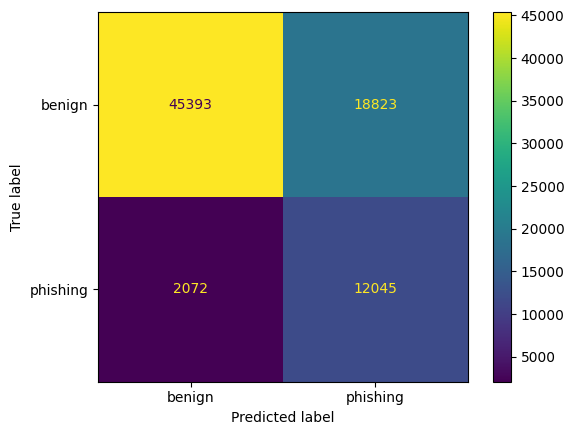

In [30]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
matrix = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["benign", "phishing"])                            
matrix.plot()

In [31]:
Accuracy = metrics.accuracy_score(y_test, y_pred)
Precision = metrics.precision_score(y_test, y_pred)
Recall = metrics.recall_score(y_test, y_pred)
F1_score = metrics.f1_score(y_test, y_pred)

In [32]:
print({"Accuracy":Accuracy,"Precision":Precision,"Recall":Recall,"F1_score":F1_score})

{'Accuracy': 0.7332541840603577, 'Precision': 0.3902099261370999, 'Recall': 0.8532266062194517, 'F1_score': 0.535511837279093}


In [35]:
df = pd.read_csv("Metrics of Dataset (Undersampling)#3.csv")

In [36]:
metrics = pd.DataFrame({"Model": "Random Forest", "Accuracy": [Accuracy], "Precision":[Precision], "Recall": [Recall], "F1_score": [F1_score]})

In [37]:
df = pd.concat([df, metrics], ignore_index=True)

In [38]:
df.head()

,Model,Accuracy,Precision,Recall,F1_score
0,LinearSVC,0.623415,0.303641,0.842459,0.446392
1,Random Forest,0.733254,0.390210,0.853227,0.535512


In [39]:
df.to_csv("Metrics of Dataset (Undersampling)#3.csv", index=False)

In [41]:
dump(rand_forest, 'rand_forest (Undersampling) #3.joblib')

['rand_forest (Undersampling) #3.joblib']